In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
sys.path.append('/Users/AbSir/Desktop/FlavaFlav')
import warnings
from scipy.integrate import simps
from scipy.integrate import quad
from summary_dictionary import ryan_data, nadia_data
from scipy.interpolate import interp1d


6.0


In [5]:
target = 'li7_1'
x = 2
print(f"Column {x} in Nadia's summary file for {target} is {nadia_data[target][x-2]}")

Column 2 in Nadia's summary file for li7_1 is 4.0


['0.050', '5.2995E-02', '4.9322E-03']
['0.150', '5.4938E-02', '1.9018E-03']
['0.250', '5.5833E-02', '1.2262E-03']
['0.350', '5.5178E-02', '8.4202E-04']
['0.450', '5.8598E-02', '6.9813E-04']
['0.550', '6.2496E-02', '5.9847E-04']
['0.650', '6.6105E-02', '4.9230E-04']
['0.750', '6.9668E-02', '4.6038E-04']
['0.850', '7.2769E-02', '4.1376E-04']
['0.950', '7.5725E-02', '3.7244E-04']
['1.050', '7.7612E-02', '3.5111E-04']
['1.150', '8.0307E-02', '3.3239E-04']
['1.250', '8.1363E-02', '3.1012E-04']
['1.350', '8.2631E-02', '2.9252E-04']
['1.450', '8.2309E-02', '2.7130E-04']
['1.550', '8.1013E-02', '2.4532E-04']
['1.650', '7.9771E-02', '2.3372E-04']
['1.750', '7.7627E-02', '2.1311E-04']
['1.850', '7.4531E-02', '1.9830E-04']
['1.950', '7.1239E-02', '1.8983E-04']
['2.050', '6.7096E-02', '1.6637E-04']
['2.150', '6.2672E-02', '1.5810E-04']
['2.250', '5.8249E-02', '1.4560E-04']
['2.350', '5.3119E-02', '1.3201E-04']
['2.450', '4.8110E-02', '1.2088E-04']
['2.550', '4.3081E-02', '1.0875E-04']
['2.650', '3

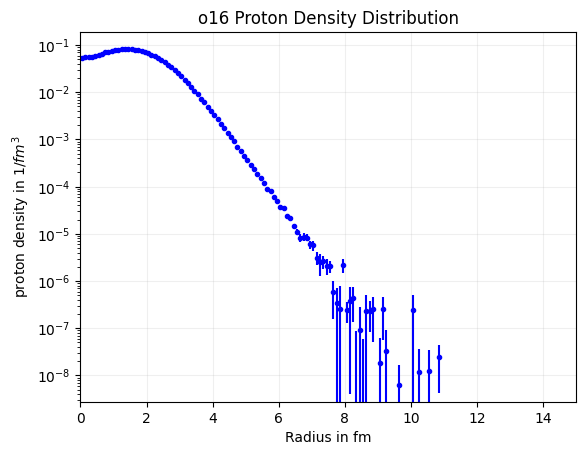

In [3]:
target = 'o16'
file_path = f'/Users/AbSir/Desktop/FlavaFlav/density/{target}.density'
R_list = []
RHORP_list = []
DRHORP_list = []
warnings.filterwarnings('ignore')
def process_data(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected 3 columns
                if len(columns) == 3:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORP, DRHORP = float(columns[0]), float(columns[1]), float(columns[2])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        print(columns)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return R_list, RHORP_list, DRHORP_list

# Assuming 'data.txt' is your file, replace 'data.txt' with your actual file path
R, RHORP, DHORP = process_data(file_path)

fig, ax = plt.subplots()

# Plot the data
ax.errorbar(R, RHORP, marker = 'o', yerr = DHORP, color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'proton density in $1/fm^3$')
ax.set_yscale('log')
ax.set_xlim(0, 15)
ax.set_title(f'{target} Proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_density_{time.time():.0f}.pdf')

# Calculating average proton density

\begin{equation}
    \langle\rho\rangle_p = \frac{\int \rho_p^2(r) r^2 dr}{\int \rho_p(r) r^2 dr}
\end{equation}

\begin{equation}
    \text{RMS Radii (oxygen)} = \sqrt{\frac{4 \pi \int \rho(r) r^4 \, dr}{8}}
\end{equation}

\begin{equation}
    N = 4 \pi \int \rho(r) r^2 \, dr
\end{equation}

In [4]:
# Convert lists to numpy arrays
r_values = np.array(R)
rhorp_values = np.array(RHORP)

# Calculate the squared values for the numerator
rhorp_squared = rhorp_values**2

# Compute the integrals. The first argument is the function to integrate, the second argument is the x values
numerator = simps(rhorp_squared * r_values**2, r_values)
denominator = simps(rhorp_values * r_values**2, r_values)
rms = simps(rhorp_values * r_values**4, r_values)
rms_radii = np.sqrt((4 * np.pi * rms) / 8)

# Calculate the expectation value
expectation_value = numerator / denominator
normalization = 4 * np.pi * denominator

print(f"The normalization constant is: {normalization:.5f}")
print(f"The RMS radius is: {rms_radii:.4f} fm")
print(f"The expectation value of the proton density for {target} is: {expectation_value:.4f} fm^3")
# norm_pdiff = (normalization - norm_actual) / norm_actual * 100
# rms_pdiff = (rms_radii - rms_actual) / rms_actual * 100
# print(f"The RMS radius percentage difference is: {rms_pdiff:.4f}%")
# print(f"The normalization percentage difference is: {norm_pdiff:.4f}%")

The normalization constant is: 7.99865
The RMS radius is: 2.6161 fm
The expectation value of the proton density for o16 is: 0.0476 fm^3


# Calculating average density of nucleons as sampled by protons


\begin{equation}
    \text{Numerator} = \int \rho_p^2(r) r^2 dr
\end{equation}

\begin{equation}
    \text{Denominator} = \int \rho_p(r) r^2 dr
\end{equation}

In [ ]:
def integrand(r):
    return r**2 * rhorp_values * (rhorn_values + rhorp_values)

nume2, _ = quad

# Plot it

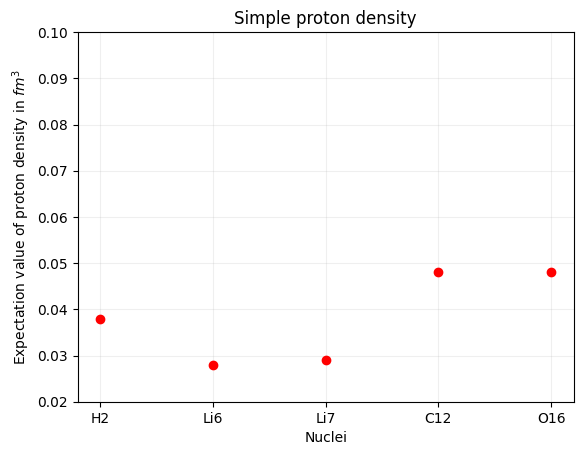

In [8]:
# List of isotopes
isotopes = ["H2", "Li6", "Li7", "C12", "O16"]

# List of corresponding expectation values of proton densities (in fm^3)
proton_densities = [0.038, 0.028, 0.029, 0.048, 0.048]

fig, ax = plt.subplots()
ax.plot(isotopes, proton_densities, 'ro')
ax.set_xlabel('Nuclei')
ax.set_ylabel(r'Expectation value of proton density in $fm^3$')
ax.set_title('Simple proton density')
ax.grid(alpha = 0.2)
ax.set_ylim(0.02, 0.1)
fig.savefig(f'plots/proton_density_{time.time():.0f}.pdf')

In [17]:
target = 'li7_1'
x = 4
nume = nadia_data[target][x-2]
print(f"Column {x} in Nadia's summary file for {target} is {nume}")
x = 2
denom = nadia_data[target][x-2]
print(f"Column {x} in Nadia's summary file for {target} is {denom}")
highproton_1 = nume / denom
print(highproton_1)

Column 4 in Nadia's summary file for li7_1 is 0.354
Column 2 in Nadia's summary file for li7_1 is 4.0
0.0885


# More accurate integration using interpolation

In [ ]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(momentum, rhokp1_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_momentum = np.linspace(min(momentum), max(momentum), num = 500)

# Evaluate the interpolation function on the new momentum points
new_rhokp1_values = interpolation_function(new_momentum)

# Filter arrays where new_momentum > 2
indices = np.where(new_momentum > 2)[0]
new_m1f = new_momentum[indices]
new_rhokp1_m1f = new_rhokp1_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = simps(new_rhokp1_m1f * new_m1f**2, new_m1f) / (2 * np.pi**2)

# For denominator, make sure to use interpolated values on full range
deno_acc = simps(new_rhokp1_values * new_momentum**2, new_momentum) / (2 * np.pi**2)

# Output the results
print("Numerator momentum:", nume_acc)
print("Denominator momentum:", deno_acc)

Numerator momentum: 0.19664122227213165
Denominator momentum: 3.022545211128888
